Assignment 1: Ensemble Learning in Action

Objective: To build, evaluate, and compare and contrast ensemble models with standard machine learning models. 
This task will demonstrate an understanding of each model's strengths and weaknesses and determine the best model for business use.

Import necessary libraries.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [3]:
df_Train= pd.read_csv("https://raw.githubusercontent.com/rbaid-9/Data-Science-2/main/train.csv", sep=";")

df_Test=pd.read_csv("https://raw.githubusercontent.com/rbaid-9/Data-Science-2/main/test.csv", sep=";")

In [4]:
df_Train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df_Train.info

<bound method DataFrame.info of        age           job   marital  education default  balance housing loan   
0       58    management   married   tertiary      no     2143     yes   no  \
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  d

In [6]:
df_Train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [7]:
df_Train.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
print(df_Train.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


In [9]:
num_duplicates = df_Train.duplicated().sum()
print(num_duplicates)

0


Convert Object to Category

In [10]:
cols_to_category = ["job","marital","education","default","housing","loan","contact","month","poutcome"]
df_Train[cols_to_category] = df_Train[cols_to_category].astype("category")

In [11]:
df_Train.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


Data transformation:

Set the target variable (no = 0 yes = 1)

In [12]:
# Convert binary variables (e.g., 'default', 'housing', 'loan', 'y') to 0 and 1
df_Train['default'] = np.where(df_Train["default"] == "no", 0, 1)
df_Train['housing'] = np.where(df_Train['housing']  == "no", 0, 1)
df_Train['loan'] = np.where(df_Train['loan']  == "no", 0, 1)

In [13]:
df_Train["y"] = np.where(df_Train["y"] == "no", 0, 1)
df_Test["y"] = np.where(df_Test["y"] == "no", 0, 1)

In [14]:
print(df_Train.dtypes)

age             int64
job          category
marital      category
education    category
default         int32
balance         int64
housing         int32
loan            int32
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y               int32
dtype: object


Visualization:

In [15]:
import matplotlib.pyplot as plt

def plot_categorical_distribution(data, column, ax, color):
    # Calculate value counts and percentages
    value_counts = data[column].value_counts()
    total_counts = value_counts.sum()
    percentages = (value_counts / total_counts * 100).round(2)

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        column: value_counts.index,
        'Percent': percentages
    })

    # Sort the data by percentage in descending order
    plot_data = plot_data.sort_values(by='Percent', ascending=False)

    # Plot the data
    sns.barplot(x='Percent', y=column, data=plot_data, ax=ax, color=color, order=plot_data[column])

    ax.set_xlabel("Percent")
    ax.set_ylabel(column)
    ax.set_title(f"{column.capitalize()} Proportions", fontsize=10)
    
    # Add percentage labels inside the bars
    for p in ax.patches:
        width = p.get_width()
        ax.annotate(f'{width}%', (width+1.1, p.get_y() + p.get_height() / 2),
                    ha='center', va='center', color='black', fontsize=9)

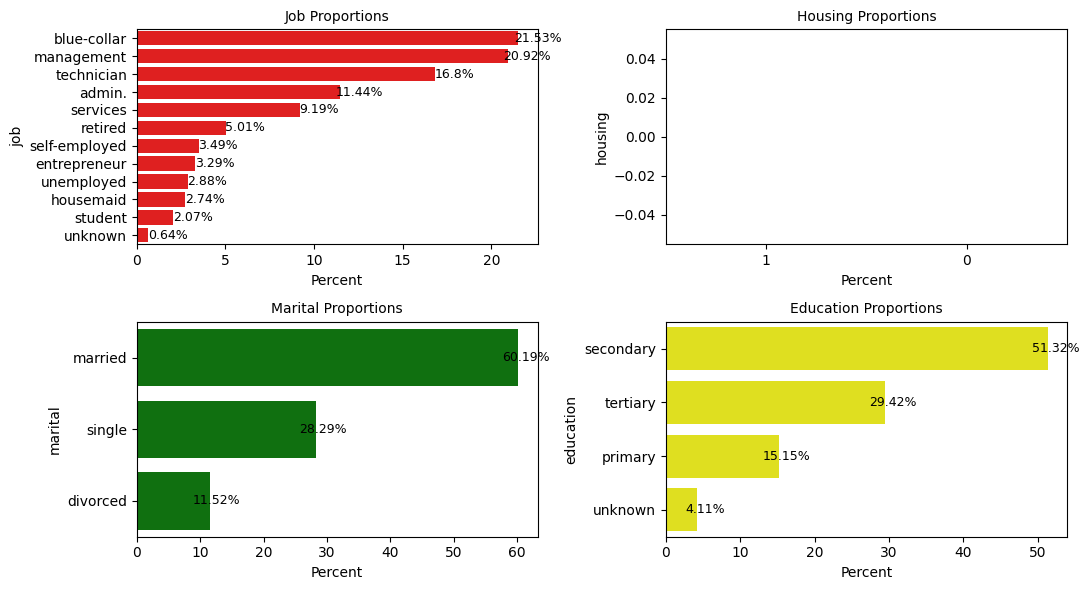

In [16]:
data = df_Train

# List of columns to plot
columns_to_plot = ["job", "housing", "marital", "education"]
colors = ["red", "blue", "green", "yellow"]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(11, 6))
axes = axes.flatten()

# Plot each categorical variable
for i, (col, color) in enumerate(zip(columns_to_plot, colors)):
    plot_categorical_distribution(data, col, axes[i], color)

fig.tight_layout()
plt.show()

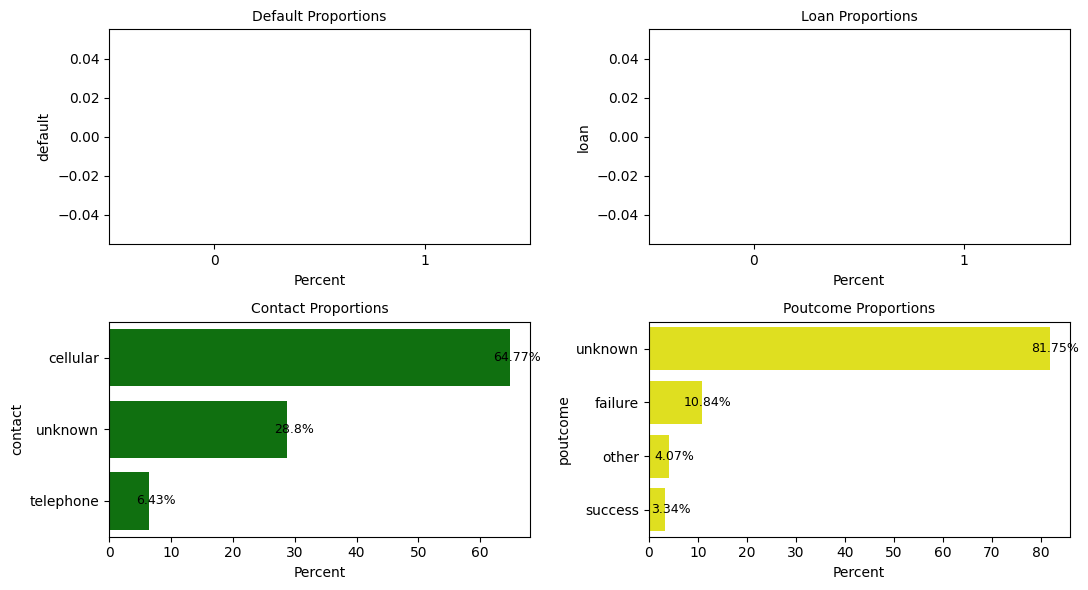

In [17]:
data = df_Train

# List of columns to plot
columns_to_plot = ["default", "loan", "contact", "poutcome"]
colors = ["red", "blue", "green", "yellow"]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(11, 6))
axes = axes.flatten()

# Plot each categorical variable
for i, (col, color) in enumerate(zip(columns_to_plot, colors)):
    plot_categorical_distribution(data, col, axes[i], color)

fig.tight_layout()
plt.show()


Target Variable count

In [18]:
(
    df_Train.loc[:, "y"]
    .value_counts()
)

y
0    39922
1     5289
Name: count, dtype: int64

In [19]:
percentage_yes = (df_Train["y"].value_counts()[1] / len(df_Train)) * 100
percentage_no = (df_Train["y"].value_counts()[0] / len(df_Train)) * 100

print("Percentage of 'yes':", percentage_yes, "%")
print("Percentage of 'no':", percentage_no, "%")


Percentage of 'yes': 11.698480458295547 %
Percentage of 'no': 88.30151954170445 %


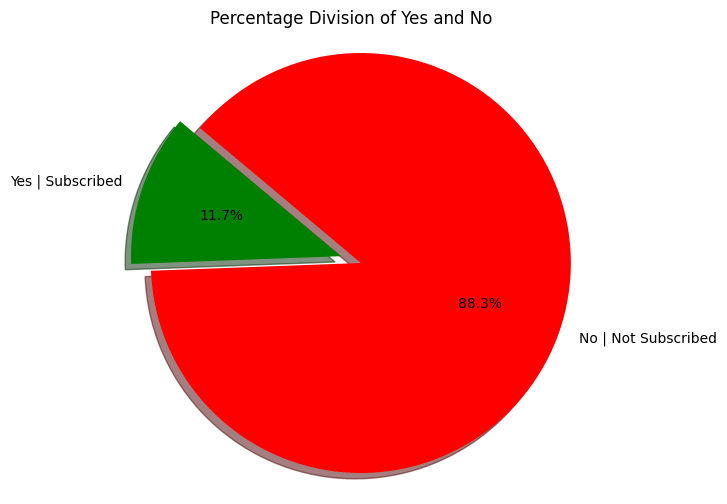

In [20]:
import matplotlib.pyplot as plt

# Data for the pie chart
labels = ['Yes | Subscribed', 'No | Not Subscribed']
sizes = [percentage_yes, percentage_no]
colors = ['green', 'red']
explode = (0.1, 0)  # Explode the 'Yes' slice (optional)

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage Division of Yes and No')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the pie chart
plt.show()


The target variable is imbalanced. 

when the target variable is imbalanced, it means that one class or category within the target variable is significantly more prevalent than others. This imbalance can introduce several challenges and issues in the modeling and evaluation process. Here are some of the key consequences and strategies to address imbalanced target variables:

1. **Biased Models**: Models trained on imbalanced data tend to be biased towards the majority class. In other words, they may perform well in predicting the majority class but poorly in predicting minority classes.

2. **Low Sensitivity**: Sensitivity (also called recall) measures the ability of a model to correctly identify instances of the minority class. Imbalanced data often leads to low sensitivity, meaning that the model may miss important cases from the minority class.

3. **High Accuracy, Low Utility**: Models can achieve high accuracy on imbalanced datasets by simply predicting the majority class most of the time. However, this accuracy can be misleading because the model fails to capture the minority class, which is often of greater interest.

To address the challenges of imbalanced target variables, several strategies can be employed:

1. **Resampling**:
   - **Oversampling**: Increase the number of instances in the minority class by duplicating existing data points or generating synthetic examples.
   - **Undersampling**: Decrease the number of instances in the majority class by randomly removing data points.

2. **Algorithm Selection**:
   - Use algorithms that are specifically designed to handle imbalanced data, such as Random Forests, Gradient Boosting, or specialized methods like SMOTE (Synthetic Minority Over-sampling Technique).

3. **Cost-sensitive Learning**: Assign different misclassification costs to different classes to make the model more sensitive to the minority class.

4. **Ensemble Methods**: Combine predictions from multiple models to improve overall performance. Techniques like bagging and boosting can be helpful.

5. **Anomaly Detection**: Treat the problem as an anomaly detection task, where the minority class is considered the "anomalies."

6. **Evaluation Metrics**: Use appropriate evaluation metrics that consider the class imbalance, such as precision, recall, F1-score, AUC-ROC, or area under the precision-recall curve (AUC-PR) instead of accuracy.

7. **Threshold Adjustment**: Adjust the classification threshold to trade off between precision and recall, depending on the specific problem's requirements.

8. **Collect More Data**: If possible, collect more data for the minority class to balance the dataset naturally.

9. **Domain Knowledge**: Incorporate domain knowledge to guide the model in giving more importance to the minority class.

It's important to note that the choice of strategy should be based on the specific characteristics of the data and the problem at hand. Not all strategies are suitable for every situation, and a combination of approaches may be necessary to address class imbalance effectively. Additionally, proper cross-validation and testing are crucial to assess the model's performance accurately in imbalanced scenarios.

In [21]:
print(df_Train.dtypes)

age             int64
job          category
marital      category
education    category
default         int32
balance         int64
housing         int32
loan            int32
contact      category
day             int64
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y               int32
dtype: object


In [22]:
# Handle categorical variables with one-hot encoding
df_Train = pd.get_dummies(df_Train, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])

In [23]:
print(df_Train.dtypes)

age                    int64
default                int32
balance                int64
housing                int32
loan                   int32
day                    int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
y                      int32
job_admin.              bool
job_blue-collar         bool
job_entrepreneur        bool
job_housemaid           bool
job_management          bool
job_retired             bool
job_self-employed       bool
job_services            bool
job_student             bool
job_technician          bool
job_unemployed          bool
job_unknown             bool
marital_divorced        bool
marital_married         bool
marital_single          bool
education_primary       bool
education_secondary     bool
education_tertiary      bool
education_unknown       bool
contact_cellular        bool
contact_telephone       bool
contact_unknown         bool
month_apr               bool
month_aug     

In [24]:
df_Train.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [26]:
# Split the data into features (X) and the target variable (y)
X = df_Train.drop(columns=['y'])
y = df_Train['y']

In [27]:
y.value_counts()

y
0    39922
1     5289
Name: count, dtype: int64

In [28]:
from imblearn.over_sampling import RandomOverSampler

# Create an oversampler
oversampler = RandomOverSampler(sampling_strategy='minority')

# Fit and apply the oversampling to your data
X_resampled, y_resampled = oversampler.fit_resample(X, y)

In [29]:
y_resampled.value_counts()

y
0    39922
1    39922
Name: count, dtype: int64

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [31]:
# Scale the features using StandardScaler for both Logistic Regression and k-NN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Baseline Logistic Regression Model with max_iter and 'l2' penalty
logistic_model = LogisticRegression(random_state=42, max_iter=1000, penalty='l2')
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

In [33]:
# Evaluate baseline models
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

print(f"Baseline Logistic Regression Accuracy: {accuracy_logistic:.2f}")

Baseline Logistic Regression Accuracy: 0.83


In [34]:
# Tune the models (GridSearchCV example)
# Define hyperparameter grids for both models
logistic_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100]
}

In [35]:
# GridSearchCV for Logistic Regression
logistic_grid_search = GridSearchCV(estimator=logistic_model, param_grid=logistic_param_grid, cv=5)
logistic_grid_search.fit(X_train_scaled, y_train)
best_logistic_model = logistic_grid_search.best_estimator_
y_pred_logistic_tuned = best_logistic_model.predict(X_test_scaled)

In [36]:
# Evaluate tuned models
accuracy_logistic_tuned = accuracy_score(y_test, y_pred_logistic_tuned)
print(f"Tuned Logistic Regression Accuracy: {accuracy_logistic_tuned:.2f}")

Tuned Logistic Regression Accuracy: 0.83


In [37]:
# Baseline k-NN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)

# Evaluate baseline models
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Baseline k-NN Accuracy: {accuracy_knn:.2f}")

Baseline k-NN Accuracy: 0.91


In [38]:
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}
# GridSearchCV for k-NN
knn_grid_search = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5)
knn_grid_search.fit(X_train_scaled, y_train)
best_knn_model = knn_grid_search.best_estimator_
y_pred_knn_tuned = best_knn_model.predict(X_test_scaled)

In [39]:
# Evaluate tuned models
accuracy_knn_tuned = accuracy_score(y_test, y_pred_knn_tuned)
print(f"Tuned k-NN Accuracy: {accuracy_knn_tuned:.2f}")

Tuned k-NN Accuracy: 0.94


 Ensemble Modelling

Random Forest

Build a Random Forest model.
Tune hyperparameters.

In [40]:
from sklearn.metrics import classification_report
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97


In [41]:
# Print a classification report for more details
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      7908
           1       0.95      1.00      0.97      8061

    accuracy                           0.97     15969
   macro avg       0.97      0.97      0.97     15969
weighted avg       0.97      0.97      0.97     15969



In [43]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}
# Create GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Model: {accuracy:.2f}")

# Print a classification report for more details
print(classification_report(y_test, y_pred))


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best Hyperparameters:
{'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy with Best Model: 0.97
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      7908
           1       0.95      1.00      0.97      8061

    accuracy                           0.97     15969
   macro avg       0.97      0.97      0.97     15969
weighted avg       0.97      0.97      0.97     15969



AdaBoost

In [44]:
# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Fit the classifier to the training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report for more details
print(classification_report(y_test, y_pred))

Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      7908
           1       0.85      0.82      0.84      8061

    accuracy                           0.84     15969
   macro avg       0.84      0.84      0.84     15969
weighted avg       0.84      0.84      0.84     15969



In [44]:
# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5, 1.0],
}
# Create GridSearchCV
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best model
best_adaboost_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_adaboost_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Model: {accuracy:.2f}")

# Print a classification report for more details
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Hyperparameters:
{'learning_rate': 1.0, 'n_estimators': 200}
Accuracy with Best Model: 0.84
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      7908
           1       0.85      0.83      0.84      8061

    accuracy                           0.84     15969
   macro avg       0.84      0.84      0.84     15969
weighted avg       0.84      0.84      0.84     15969



Bagging

In [45]:
# Create a Decision Tree classifier (base classifier)
base_classifier = DecisionTreeClassifier(random_state=42)

# Create a Bagging Classifier with Decision Tree as the base classifier
bagging_classifier = BaggingClassifier(base_classifier, n_estimators=100, random_state=42)

# Fit the Bagging Classifier to the training data
bagging_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print a classification report for more details
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      0.93      0.96      7908
           1       0.93      1.00      0.97      8061

    accuracy                           0.96     15969
   macro avg       0.97      0.96      0.96     15969
weighted avg       0.97      0.96      0.96     15969



In [46]:
from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}
# Create GridSearchCV
grid_search = GridSearchCV(estimator=bagging_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:")
print(grid_search.best_params_)

# Get the best model
best_bagging_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_bagging_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with Best Model: {accuracy:.2f}")

# Print a classification report for more details
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters:
{'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 200}
Accuracy with Best Model: 0.98
              precision    recall  f1-score   support

           0       1.00      0.97      0.98      7908
           1       0.97      1.00      0.98      8061

    accuracy                           0.98     15969
   macro avg       0.98      0.98      0.98     15969
weighted avg       0.98      0.98      0.98     15969



Voting

In [49]:
from sklearn.svm import SVC

In [52]:
# Define the individual classifiers

dt = DecisionTreeClassifier(max_depth=20)
knn = KNeighborsClassifier(n_neighbors=10)
svm_classifier = SVC(probability=True, random_state=42)

In [53]:
hard_voting_classifier = VotingClassifier(
    estimators=[
        ('decision_tree', dt),
        ('knn', knn),
        ('svm', svm_classifier),
    ],
    voting='hard'
)
# Fit the hard voting classifier to the data
hard_voting_classifier.fit(X_train, y_train)
# Make predictions with the hard voting classifier
hard_voting_predictions = hard_voting_classifier.predict(X_test)

In [55]:

print("hard Voting Classifier Accuracy:", accuracy_score(y_test, hard_voting_predictions))
print("Classification Report for hard Voting Classifier:")
print(classification_report(y_test, hard_voting_predictions))

hard Voting Classifier Accuracy: 0.8802053979585447
Classification Report for hard Voting Classifier:
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      7908
           1       0.85      0.92      0.89      8061

    accuracy                           0.88     15969
   macro avg       0.88      0.88      0.88     15969
weighted avg       0.88      0.88      0.88     15969



In [54]:
# Create a Voting Classifier with soft voting
soft_voting_classifier = VotingClassifier(estimators=[
        ('decision_tree', dt),
        ('knn', knn),
        ('svm', svm_classifier),
], voting='soft')
# Fit the classifiers on the training data
soft_voting_classifier.fit(X_train, y_train)
# Make predictions using both hard and soft voting classifiers
soft_voting_predictions = soft_voting_classifier.predict(X_test)
print("Soft Voting Classifier Accuracy:", accuracy_score(y_test, soft_voting_predictions))
print("Classification Report for Soft Voting Classifier:")
print(classification_report(y_test, soft_voting_predictions))

Soft Voting Classifier Accuracy: 0.9267956666040453
Classification Report for Soft Voting Classifier:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      7908
           1       0.89      0.98      0.93      8061

    accuracy                           0.93     15969
   macro avg       0.93      0.93      0.93     15969
weighted avg       0.93      0.93      0.93     15969

